In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [2]:
import pickle

In [3]:
!ls

german-traffic-signs  sample_data


In [4]:
!cd german-traffic-signs

In [5]:
!ls

german-traffic-signs  sample_data


In [6]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)

with open('german-traffic-signs/test.p','rb') as f:  
  test_data = pickle.load(f)

with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pickle.load(f)

print('Done')

Done


In [7]:
type (train_data)

dict

In [8]:
train_data

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [9]:
x_train , y_train = train_data['features'], train_data['labels']
x_test , y_test = test_data['features'] , test_data['labels']
x_val , y_val = val_data['features'] , val_data['labels']

In [10]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [11]:
import pandas as pd

data = pd.read_csv('german-traffic-signs/signnames.csv')

print (data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

(32, 32, 3)
The lable of the Pic: 41


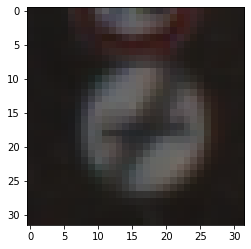

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(x_train[0].shape)
print('The lable of the Pic:',y_train[0])

**Image PreProcessing**

In [13]:
import cv2

In [14]:
#converting images into gray scale so that the neural network can learn the pattern easily



def gray(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

#equalizing images to make the features in the images more porminent for the model to understand

def equalize(img):
  img = cv2.equalizeHist(img)
  
  return img

def preprocessing(img):
  img = gray(img)
  img = equalize(img)
  #now normalizing the images
  img = img/255
  return img
  

print('Done')

Done


In [15]:
import numpy as np

In [16]:
x_train = np.array(list(map(preprocessing,x_train)))
x_test = np.array(list(map(preprocessing,x_test)))
x_val = np.array(list(map(preprocessing,x_val)))

 **Img after preprocessing**

(34799, 32, 32)


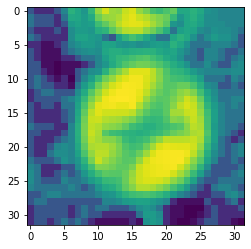

In [17]:
plt.imshow(x_train[0])
print(x_train.shape)

In [18]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val,43)

In [21]:
x_train = x_train.reshape(34799,32,32,1)
x_test = x_test.reshape(12630,32,32,1)
x_val = x_val.reshape(4410,32,32,1)

In [22]:
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()

In [25]:
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(32,32,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(15,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(43,activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 15)        4335      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 540)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               270500    
_________________________________________________________________
dropout (Dropout)            (None, 500)              

In [29]:
model.fit(x_train,y_train,epochs=20,batch_size=500,verbose=1,shuffle=True)

Epoch 1/20
70/70 [==============================] - 1s 9ms/step - loss: 0.0716 - accuracy: 0.9791
Epoch 2/20
70/70 [==============================] - 1s 8ms/step - loss: 0.0638 - accuracy: 0.9805
Epoch 3/20
70/70 [==============================] - 1s 8ms/step - loss: 0.0547 - accuracy: 0.9837
Epoch 4/20
70/70 [==============================] - 1s 8ms/step - loss: 0.0547 - accuracy: 0.9835
Epoch 5/20
70/70 [==============================] - 1s 8ms/step - loss: 0.0424 - accuracy: 0.9878
Epoch 6/20
70/70 [==============================] - 1s 8ms/step - loss: 0.0374 - accuracy: 0.9894
Epoch 7/20
70/70 [==============================] - 1s 8ms/step - loss: 0.0335 - accuracy: 0.9898
Epoch 8/20
70/70 [==============================] - 1s 8ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 9/20
70/70 [==============================] - 1s 8ms/step - loss: 0.0296 - accuracy: 0.9913
Epoch 10/20
70/70 [==============================] - 1s 8ms/step - loss: 0.0289 - accuracy: 0.9916
Epoch 11/20
70/70 [

In [30]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
from sklearn.metrics import classification_report

In [32]:
predictions[0]

16

In [33]:
y_test = np.argmax(y_test,axis=1)

In [34]:
y_test[0]

16

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        60
           1       0.91      0.95      0.93       720
           2       0.89      0.98      0.93       750
           3       0.95      0.91      0.93       450
           4       0.95      0.90      0.92       660
           5       0.85      0.88      0.86       630
           6       1.00      0.69      0.82       150
           7       0.92      0.87      0.90       450
           8       0.91      0.92      0.91       450
           9       0.97      1.00      0.98       480
          10       0.98      0.99      0.98       660
          11       0.89      0.88      0.88       420
          12       0.96      0.97      0.97       690
          13       1.00      0.99      1.00       720
          14       0.96      0.99      0.98       270
          15       0.96      0.95      0.95       210
          16       1.00      0.99      1.00       150
          17       0.99    

**To save Model**

In [ ]:
#model.save('models.h5')